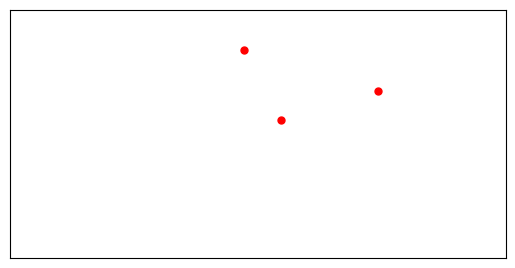

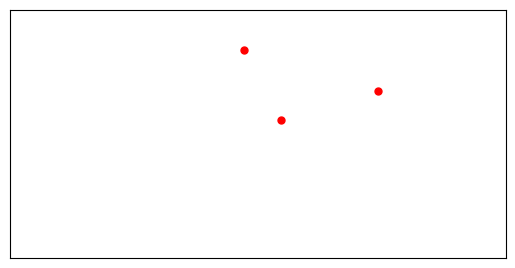

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from itertools import combinations
import random

# Define constants
BOX_WIDTH = 100
BOX_HEIGHT = 50
NUM_PARTICLES = 1
PARTICLE_RADIUS = 2  # Define a size for the particles
INITIAL_SPEED = 1
STEPS = 400

# Define the Particle class
class Particle:
    def __init__(self, species, x, y, vx, vy):
        self.species = species
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

# Initialize particles
particles = [Particle('A', random.uniform(PARTICLE_RADIUS, BOX_WIDTH - PARTICLE_RADIUS),
                      random.uniform(PARTICLE_RADIUS, BOX_HEIGHT - PARTICLE_RADIUS),
                      INITIAL_SPEED, INITIAL_SPEED) for _ in range(NUM_PARTICLES)] + \
            [Particle('B', random.uniform(PARTICLE_RADIUS, BOX_WIDTH - PARTICLE_RADIUS),
                      random.uniform(PARTICLE_RADIUS, BOX_HEIGHT - PARTICLE_RADIUS),
                      INITIAL_SPEED, INITIAL_SPEED) for _ in range(NUM_PARTICLES)] + \
            [Particle('C', random.uniform(PARTICLE_RADIUS, BOX_WIDTH - PARTICLE_RADIUS),
                      random.uniform(PARTICLE_RADIUS, BOX_HEIGHT - PARTICLE_RADIUS),
                      INITIAL_SPEED, INITIAL_SPEED) for _ in range(NUM_PARTICLES)]

# Function to update positions and handle wall collisions
def update_positions(particles):
    for particle in particles:
        particle.x += particle.vx
        particle.y += particle.vy
        # Bounce off walls
        if particle.x > BOX_WIDTH - PARTICLE_RADIUS or particle.x < PARTICLE_RADIUS:
            particle.vx *= -1
        if particle.y > BOX_HEIGHT - PARTICLE_RADIUS or particle.y < PARTICLE_RADIUS:
            particle.vy *= -1

# Function to handle collisions between particles
def handle_collisions(particles):
    for p1, p2 in combinations(particles, 2):
        distance = np.hypot(p1.x - p2.x, p1.y - p2.y)
        if distance < 2 * PARTICLE_RADIUS:  # Assuming particles are touching or overlapping
            # Determine the new species after collision
            if {p1.species, p2.species} == {'A', 'B'}:
                new_species = 'C'
            elif {p1.species, p2.species} == {'A', 'C'}:
                new_species = 'B'
            elif {p1.species, p2.species} == {'B', 'C'}:
                new_species = 'A'
            else:
                continue  # No species change for collisions between particles of the same type
            # Update the species of the particles
            p1.species = new_species
            p2.species = new_species

# Set up the figure, the axis, and the plot element for animation
fig, ax = plt.subplots()
ax.set_xlim(0, BOX_WIDTH)
ax.set_ylim(0, BOX_HEIGHT)
ax.set_aspect(1)
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels
species_colors = {'A': 'b', 'B': 'g', 'C': 'r'}
particles_drawing = [ax.plot([], [], 'o', ms=5, color=species_colors[particle.species])[0] for particle in particles]

# Initialization function for the animation
def init():
    for particle_drawing in particles_drawing:
        particle_drawing.set_data([], [])
    return particles_drawing

# Animation update function
def animate(i):
    update_positions(particles)
    handle_collisions(particles)
    for particle_drawing, particle in zip(particles_drawing, particles):
        particle_drawing.set_data([particle.x], [particle.y])
        particle_drawing.set_color(species_colors[particle.species])
    return particles_drawing

# Create the animation object
anim = FuncAnimation(fig, animate, init_func=init, frames=STEPS, interval=20, blit=True)

# Save the animation
animation_file_path = 'particle_simulation2.gif'
anim.save(animation_file_path, writer=PillowWriter(fps=30))

# After the animation is completed, plot the final state and save it as an image
def save_final_state(particles):
    fig, ax = plt.subplots()
    ax.set_xlim(0, BOX_WIDTH)
    ax.set_ylim(0, BOX_HEIGHT)
    ax.set_aspect(1)
    ax.set_xticks([])  # Remove x-axis labels
    ax.set_yticks([])  # Remove y-axis labels
    for particle in particles:
        ax.plot(particle.x, particle.y, 'o', ms=5, color=species_colors[particle.species])
    plt.savefig('final_state_1.png')  # Save the figure to a file

# At the end of your script, after the animation has been created
save_final_state(particles)
    
# To display the animation in the Jupyter Notebook
from IPython.display import Image
Image(url=animation_file_path)